In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Load the dataset
df = pd.read_csv("data_grouped_raw.csv")
original_df = df
# Display basic info
print(df.shape)
df.head()

(7470, 21)


,repo,file,nloc,ccn_avg,ccn_std,num_functions,changes,authors,main_author_ratio,age_days,...,lines_added,lines_deleted,churn_rate,entropy,comment_density,bugfix_ratio,changes_per_kloc,fixes_per_age,fix_count,defective
0,https_github.com_DapperLib_Dapper_metrics,Dapper/SqlMapper.Async.cs,624,5.791667,4.949572,24,60,13,0.40,3661,...,2941,1362,6.884800,2.199312,0.474112,0.200000,36.945813,0.003277,12,1
1,https_github.com_DapperLib_Dapper_metrics,tests/Dapper.Tests/AsyncTests.cs,925,1.230769,0.626817,65,15,6,0.40,1856,...,3833,122,4.271058,2.583745,0.010368,0.133333,7.792208,0.001077,2,1
2,https_github.com_DapperLib_Dapper_metrics,Dapper/SqlMapper.GridReader.Async.cs,186,3.615385,2.370928,13,30,6,0.40,3661,...,635,262,4.796791,2.506527,0.308917,0.100000,25.295110,0.000819,3,1
3,https_github.com_DapperLib_Dapper_metrics,benchmarks/Dapper.Tests.Performance/Benchmarks...,82,1.000000,0.000000,3,5,3,0.60,1856,...,353,1,4.265060,4.419276,0.000000,0.000000,4.621072,0.000000,0,0
4,https_github.com_DapperLib_Dapper_metrics,benchmarks/Dapper.Tests.Performance/Benchmarks...,58,1.000000,0.000000,6,8,6,0.25,1727,...,154,9,2.762712,2.290380,0.014925,0.000000,7.561437,0.000000,0,0


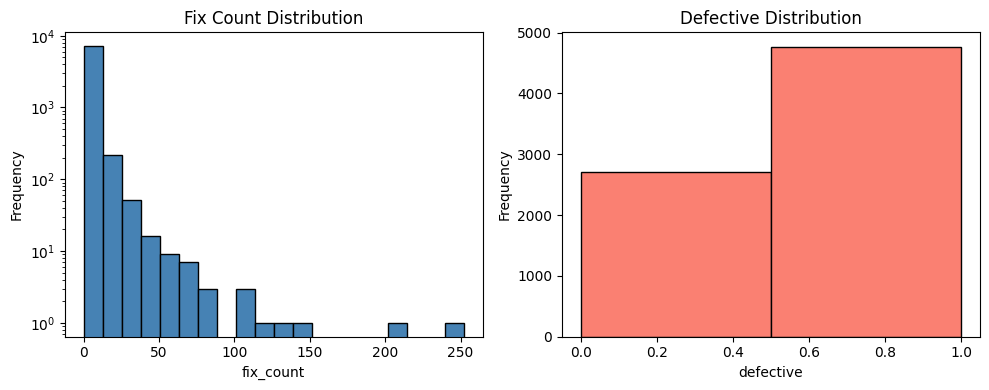

In [15]:
# Set up the figure with 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram for fix_count
axes[0].hist(df['fix_count'], bins=20, color='steelblue', edgecolor='black')
axes[0].set_title('Fix Count Distribution')
axes[0].set_xlabel('fix_count')
axes[0].set_yscale('log')
axes[0].set_ylabel('Frequency')

# Histogram for defective (binary)
axes[1].hist(df['defective'], bins=2, color='salmon', edgecolor='black')
axes[1].set_title('Defective Distribution')
axes[1].set_xlabel('defective')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [16]:
# Keep only numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Show shape and preview
print(df_numeric.shape)
df_numeric.head()


(7470, 19)


,nloc,ccn_avg,ccn_std,num_functions,changes,authors,main_author_ratio,age_days,last_mod_days,lines_added,lines_deleted,churn_rate,entropy,comment_density,bugfix_ratio,changes_per_kloc,fixes_per_age,fix_count,defective
0,624,5.791667,4.949572,24,60,13,0.40,3661,217,2941,1362,6.884800,2.199312,0.474112,0.200000,36.945813,0.003277,12,1
1,925,1.230769,0.626817,65,15,6,0.40,1856,217,3833,122,4.271058,2.583745,0.010368,0.133333,7.792208,0.001077,2,1
2,186,3.615385,2.370928,13,30,6,0.40,3661,278,635,262,4.796791,2.506527,0.308917,0.100000,25.295110,0.000819,3,1
3,82,1.000000,0.000000,3,5,3,0.60,1856,278,353,1,4.265060,4.419276,0.000000,0.000000,4.621072,0.000000,0,0
4,58,1.000000,0.000000,6,8,6,0.25,1727,278,154,9,2.762712,2.290380,0.014925,0.000000,7.561437,0.000000,0,0


In [17]:
# Drop the specified columns if they exist
import numpy as np
cols_to_drop = ['fixes_per_age', 'fix_count']
df = df_numeric.drop(columns=[c for c in cols_to_drop if c in df.columns])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df = df.select_dtypes(include=[np.number])
df.head()


,nloc,ccn_avg,ccn_std,num_functions,changes,authors,main_author_ratio,age_days,last_mod_days,lines_added,lines_deleted,churn_rate,entropy,comment_density,bugfix_ratio,changes_per_kloc,defective
0,87,1.000000,0.000000,4,136,22,0.514706,2577,132,3409,2269,64.522727,4.440582,0.344262,0.036765,125.114995,1
1,31,1.500000,0.500000,2,4,2,0.750000,3180,2883,67,2,2.156250,2.776615,0.384615,0.000000,3.879728,0
2,149,1.166667,0.372678,12,103,15,0.611650,2836,123,2426,1239,24.433333,4.467534,0.011628,0.097087,89.643168,1
3,14,1.000000,0.000000,1,66,29,0.212121,3896,444,219,129,23.200000,4.063258,0.100000,0.090909,65.088757,1
4,85,1.000000,0.000000,4,2,1,1.000000,2837,1361,145,1,1.697674,6.319640,0.319444,0.500000,1.843318,1


In [18]:
import joblib
model = joblib.load("svm_model.pkl")

### SVM

In [19]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_val = df.drop(columns=['defective'])
y_val = df['defective']

# Predict
y_pred = model.predict(X_val)

# Evaluate
acc = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {acc:.4f}\n")
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Validation Accuracy: 0.9901

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2703
           1       0.99      0.99      0.99      4767

    accuracy                           0.99      7470
   macro avg       0.99      0.99      0.99      7470
weighted avg       0.99      0.99      0.99      7470

Confusion Matrix:
 [[2675   28]
 [  46 4721]]


In [20]:
y_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [21]:
df_eval = df.copy()
df_eval["repo"] = original_df["repo"]
df_eval["predicted"] = y_pred

In [22]:
rows = []

for repo, group in df_eval.groupby("repo"):
    y_true = group["defective"]
    y_pred_grp = group["predicted"]

    acc = accuracy_score(y_true, y_pred_grp)
    report = classification_report(y_true, y_pred_grp, output_dict=True, zero_division=0)

    rows.append({
        "repo": repo,
        "accuracy": acc,
        "precision_0": report["0"]["precision"],
        "recall_0": report["0"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "precision_1": report["1"]["precision"],
        "recall_1": report["1"]["recall"],
        "f1_1": report["1"]["f1-score"],
    })

repo_metrics = pd.DataFrame(rows)
repo_metrics

,repo,accuracy,precision_0,recall_0,f1_0,precision_1,recall_1,f1_1
0,https_github.com_DapperLib_Dapper_metrics,0.993590,0.983333,1.000000,0.991597,1.000000,0.989691,0.994819
1,https_github.com_JamesNK_Newtonsoft.Json_metrics,0.986229,0.971831,0.991379,0.981508,0.994907,0.983221,0.989030
2,https_github.com_SixLabors_ImageSharp_metrics,0.991162,0.984579,0.991637,0.988095,0.995070,0.990884,0.992973
3,https_github.com_jellyfin_jellyfin_metrics,0.990094,0.986301,0.986301,0.986301,0.992242,0.992242,0.992242
4,https_github.com_mathnet_mathnet-numerics_metrics,0.990750,0.988095,0.985163,0.986627,0.992151,0.993711,0.992930
5,https_github.com_microsoft_calculator_metrics,0.978723,0.968750,0.968750,0.968750,0.983871,0.983871,0.983871
6,https_github.com_xunit_xunit_metrics,0.991185,0.980822,0.994444,0.987586,0.996951,0.989410,0.993166
